In [53]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.ndimage
import math
from PIL import ImageFont
from PIL import ImageDraw

In [8]:
def showImage(image):
    plt.rcParams["figure.figsize"] = (16,9)
    plt.imshow(image, cmap='gray')
    plt.show()

In [51]:
def preprocess(image):
    image = 255 - image
    edges = cv2.Canny(image, 50, 150, 3)
    lines = cv2.HoughLinesP(edges, 0.1, np.pi/720, 51, 6, 6)
    
    radianSum = 0
    n = 0
    
    for line in lines:
        x1, y1, x2, y2 = line[0]
        radianSum += math.atan2(y2-y1,x2-x1)
        n += 1

    radianSum = radianSum / n
    return scipy.ndimage.rotate(image, np.degrees(radianSum), reshape=False)

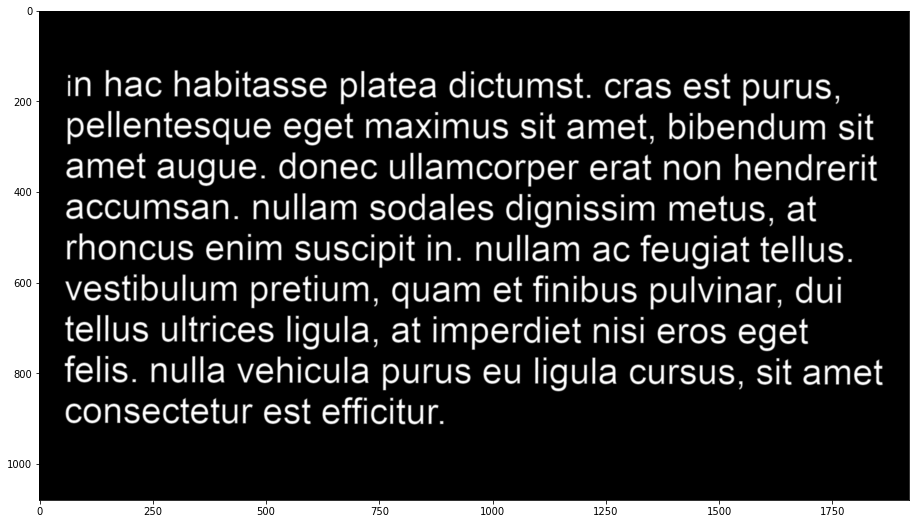

In [52]:
image = np.matrix(Image.open("text.png").convert("L"))
image = preprocess(image)
showImage(image)

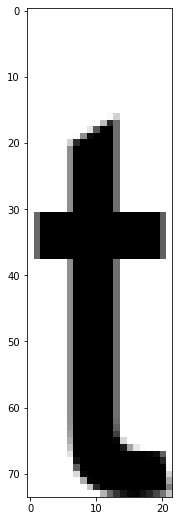

In [61]:
font = ImageFont.truetype("arial.ttf", size = 80)
letter = Image.new('L', font.getsize("t"), 255)
draw = ImageDraw.Draw(letter)
draw.text((0,0), "t", font=font)
plt.imshow(letter, cmap=plt.cm.gray)
plt.show()